In [1]:
# setting the graphic width and height for ggplot
library(repr)
options(repr.plot.width=10, repr.plot.height=6.19)

# Exploring Raw data

    Historical weather data from Boston, USA
    12 months beginning Dec 2014
    data is dirty
    column names are values, Variables are coded incorrectly and missing and extreme values
    

In [2]:
weather <- readRDS("~/R_datacamp/weather.rds")

In [3]:
head(weather)

X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52,52,41,30,30
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45,46,36,26,25
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38,40,30,22,20
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34,42,26,10,8
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31,35,20,4,5
6,2014,12,Min.DewpointF,26,17,24,13,12,36,...,25,37,41,29,28,29,27,10,-6,1


**The first think you do with a new dataset is to understand the structure.**
<br>class() to find out if you have a tabular data set (data.frame)
<br>dim() lets you check how many rows and columns there are
<br>colnames() lets you see your column names

In [4]:
class(weather)

[1] "data.frame"

In [5]:
dim(weather)

[1] 286  35

In [6]:
names(weather)

[1] "X"       "year"    "month"   "measure" "X1"      "X2"      "X3"     
 [8] "X4"      "X5"      "X6"      "X7"      "X8"      "X9"      "X10"    
[15] "X11"     "X12"     "X13"     "X14"     "X15"     "X16"     "X17"    
[22] "X18"     "X19"     "X20"     "X21"     "X22"     "X23"     "X24"    
[29] "X25"     "X26"     "X27"     "X28"     "X29"     "X30"     "X31"

str() stands for structure and lets you see the class and dimensions of the entire dataset and also the class of each variable and a preview of its content
<br>glimpse() from dplyr is an alternative to str, which is a bit cleaner
<br>summary() has for each variable a summary. It helps to reveal unusual or extreme values, unexpected missing data. For numeric variables it will give you mean, median, quartiles. For character or factor variables it gives you count.

In [7]:
str(weather)

'data.frame':	286 obs. of  35 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ year   : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ month  : int  12 12 12 12 12 12 12 12 12 12 ...
 $ measure: chr  "Max.TemperatureF" "Mean.TemperatureF" "Min.TemperatureF" "Max.Dew.PointF" ...
 $ X1     : chr  "64" "52" "39" "46" ...
 $ X2     : chr  "42" "38" "33" "40" ...
 $ X3     : chr  "51" "44" "37" "49" ...
 $ X4     : chr  "43" "37" "30" "24" ...
 $ X5     : chr  "42" "34" "26" "37" ...
 $ X6     : chr  "45" "42" "38" "45" ...
 $ X7     : chr  "38" "30" "21" "36" ...
 $ X8     : chr  "29" "24" "18" "28" ...
 $ X9     : chr  "49" "39" "29" "49" ...
 $ X10    : chr  "48" "43" "38" "45" ...
 $ X11    : chr  "39" "36" "32" "37" ...
 $ X12    : chr  "39" "35" "31" "28" ...
 $ X13    : chr  "42" "37" "32" "28" ...
 $ X14    : chr  "45" "39" "33" "29" ...
 $ X15    : chr  "42" "37" "32" "33" ...
 $ X16    : chr  "44" "40" "35" "42" ...
 $ X17    : chr  "49" "45" "41" "46" ...
 $

In [8]:
library(dplyr)
glimpse(weather)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Observations: 286
Variables: 35
$ X       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
$ year    <int> 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,...
$ month   <int> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,...
$ measure <chr> "Max.TemperatureF", "Mean.TemperatureF", "Min.TemperatureF"...
$ X1      <chr> "64", "52", "39", "46", "40", "26", "74", "63", "52", "30.4...
$ X2      <chr> "42", "38", "33", "40", "27", "17", "92", "72", "51", "30.7...
$ X3      <chr> "51", "44", "37", "49", "42", "24", "100", "79", "57", "30....
$ X4      <chr> "43", "37", "30", "24", "21", "13", "69", "54", "39", "30.5...
$ X5      <chr> "42", "34", "26", "37", "25", "12", "85", "66", "47", "30.6...
$ X6      <chr> "45", "42", "38", "45", "40", "36", "100", "93", "85", "30....
$ X7      <chr> "38", "30", "21", "36", "20", "-3", "92", "61", "29", "30.6...
$ X8      <chr> "29", "24", "18", "28", "16", "3", "92", "70", "47", "30.77...
$ X9      <chr> "49"

In [9]:
summary(weather)


       X               year          month          measure         
 Min.   :  1.00   Min.   :2014   Min.   : 1.000   Length:286        
 1st Qu.: 72.25   1st Qu.:2015   1st Qu.: 4.000   Class :character  
 Median :143.50   Median :2015   Median : 7.000   Mode  :character  
 Mean   :143.50   Mean   :2015   Mean   : 6.923                     
 3rd Qu.:214.75   3rd Qu.:2015   3rd Qu.:10.000                     
 Max.   :286.00   Max.   :2015   Max.   :12.000                     
      X1                 X2                 X3                 X4           
 Length:286         Length:286         Length:286         Length:286        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       

**Looking at your data**
<br>observation are in your rows and variables are in your columns
<br>print() lets you see the whole data set (not recommended with large datasets)
<br>head() lets you see the first 6 rows
<br>tail() lets you see the last 6 rows

In [10]:
head(weather)

X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52,52,41,30,30
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45,46,36,26,25
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38,40,30,22,20
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34,42,26,10,8
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31,35,20,4,5
6,2014,12,Min.DewpointF,26,17,24,13,12,36,...,25,37,41,29,28,29,27,10,-6,1


In [11]:
tail(weather)

,X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
281,281,2015,12,Mean.Wind.SpeedMPH,6,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
282,282,2015,12,Max.Gust.SpeedMPH,17,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
283,283,2015,12,PrecipitationIn,0.14,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
284,284,2015,12,CloudCover,7,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
285,285,2015,12,Events,Rain,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
286,286,2015,12,WindDirDegrees,109,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Introduction to tidyr

## Gathering columns into key-value pairs
gather() used when columns that are not variables and you want to collapse them into key-value pairs.
It makes wide datasets long

gather(data, key, value,...)
<br>gather(df, time, val, t1:t3)
<br>the : operator allows to select multiple columns to be gathered

In [12]:
# Column names are values
# The weather dataset has the days in the column which you want to be a value

library(tidyr)
weather2 <- gather(weather, key = day , value, X1:X31, na.rm = TRUE)

# View the head
head(weather2)
summary(weather2)

X,year,month,measure,day,value
1,2014,12,Max.TemperatureF,X1,64
2,2014,12,Mean.TemperatureF,X1,52
3,2014,12,Min.TemperatureF,X1,39
4,2014,12,Max.Dew.PointF,X1,46
5,2014,12,MeanDew.PointF,X1,40
6,2014,12,Min.DewpointF,X1,26


       X            year          month         measure         
 Min.   :  1   Min.   :2014   Min.   : 1.00   Length:8046       
 1st Qu.: 68   1st Qu.:2015   1st Qu.: 4.00   Class :character  
 Median :133   Median :2015   Median : 7.00   Mode  :character  
 Mean   :133   Mean   :2015   Mean   : 6.54                     
 3rd Qu.:199   3rd Qu.:2015   3rd Qu.:10.00                     
 Max.   :286   Max.   :2015   Max.   :12.00                     
     day               value          
 Length:8046        Length:8046       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

## Spreading key-value pairs into columns
spread() opposite of gather, takes key-values pairs and spreads them across multiple columns. This is useful when values in a column should actually be column names (variables). Can make the data more compact and easier to read. It makes long datasets wide

spread(data, key, value, ...)

In [13]:
# Values are variable names 
# The measure column should be variables
# also first column is not needed 

# First remove column of row names
without_x <- weather2[, -1]

# Spread the data
weather3 <- spread(without_x, key = measure , value)

# View the head
head(weather3)

year,month,day,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
2014,12,X1,6,Rain,46,29,74,30.45,64,...,10,13,40,26,52,30.01,39,10,0.01,268
2014,12,X10,8,Rain,45,29,100,29.58,48,...,3,13,39,37,89,29.43,38,1,0.28,357
2014,12,X11,8,Rain-Snow,37,28,92,29.81,39,...,7,13,31,27,82,29.44,32,1,0.02,230
2014,12,X12,7,Snow,28,21,85,29.88,39,...,10,11,27,25,64,29.81,31,7,T,286
2014,12,X13,5,,28,23,75,29.86,42,...,10,12,26,24,55,29.78,32,10,T,298
2014,12,X14,4,,29,20,82,29.91,45,...,10,10,27,25,53,29.78,33,10,0.00,306


## Separate columns
separates one column into multiple columns. It will separate the column on any character that is not a letter or number as its default. To specify the separation you can use sep

seperate(data, col, into, ...)

        data: data frame
        col: bare naem of column to separate
        into: character vector of new column names
        sep = "-"

## Unite columns
unite(data, col, ...)

        data: a data frame
        col: bare name of new column
        ...: bare names of columns to unite
        "_": is the default connection


**visualization of the data**
<br>are useful to quickly identifying extreme or suspicious values.
<br>histogram (hist()) and scatterplot (plot) are especially useful for this.

# String manipulation
## Finding and replacing strings

Like all functions in stringr the first argument of each is the string of interest.
<br>The second argument is the pattern of interest

In [34]:
library(stringr)
str_detect(c("banana", "kiwi"), "a")

[1]  TRUE FALSE

In [35]:
str_replace(c("banana", "kiwi"), "a", "o")

[1] "bonana" "kiwi"

In [36]:
# Remove X's from day column
weather3$day <- str_replace(weather3$day, "X", "")

# Unite the year, month, and day columns with the unite function from above tidyr package
weather4 <- unite(weather3, date, year, month, day, sep = "-")

head(weather4)

date,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
2014-12-1,6,Rain,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-10,8,Rain,45,29,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357
2014-12-11,8,Rain-Snow,37,28,92,29.81,39,10,21,...,7,13,31,27,82,29.44,32,1,0.02,230
2014-12-12,7,Snow,28,21,85,29.88,39,10,16,...,10,11,27,25,64,29.81,31,7,T,286
2014-12-13,5,,28,23,75,29.86,42,10,17,...,10,12,26,24,55,29.78,32,10,T,298
2014-12-14,4,,29,20,82,29.91,45,10,15,...,10,10,27,25,53,29.78,33,10,0.00,306


## Trimming and padding strings
Common issue is removing leading or trailing white space
<br>str_trim()

In [37]:
library(stringr)
str_trim("  this is a test     ")

[1] "this is a test"

Another issue is when you need to pad strings to make them a certian number of character wide. Example woulde be employee ID which sometimes start with some zeroes. These could have been lost during the uploading process

In [38]:
str_pad("24493", width = 7, side = "left", pad = "0")

[1] "0024493"

## Dates with lubridate

In [39]:
library(lubridate)

The letters y, m, d, h, m, s, which stand for year, month, day, hour, minute, and second, respectively

In [40]:
# Parse as date
dmy("17 Sep 2015")

# Parse as date and time (with no seconds!)
mdy_hm("July 15, 2012 12:56")

[1] "2015-09-17"

[1] "2012-07-15 12:56:00 UTC"

In [41]:
# Convert date column to proper date format using lubridates's ymd()
weather4$date <- ymd(weather4$date)

# Rearrange columns using dplyr's select()
weather5 <- select(weather4, date, Events, CloudCover:WindDirDegrees)

# View the head of weather5
head(weather5)

date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
2014-12-01,Rain,6,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-10,Rain,8,45,29,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357
2014-12-11,Rain-Snow,8,37,28,92,29.81,39,10,21,...,7,13,31,27,82,29.44,32,1,0.02,230
2014-12-12,Snow,7,28,21,85,29.88,39,10,16,...,10,11,27,25,64,29.81,31,7,T,286
2014-12-13,,5,28,23,75,29.86,42,10,17,...,10,12,26,24,55,29.78,32,10,T,298
2014-12-14,,4,29,20,82,29.91,45,10,15,...,10,10,27,25,53,29.78,33,10,0.00,306


# Types of variables in R
R stores data in different formats. The class() function can tell you which type of data you have
<br> under the hood, the logical values TRUE and FALSE are coded as 1 and 0, respectively. Therefore, as.logical(1) returns TRUE and as.numeric(TRUE) returns 1.

to coerce a variable use as.numeric(), as.factor, as.integer, as.character

In [42]:
# "character"
class("TRUE")

#  "numeric"
class(8484.00)

#  "integer"
class(99L)

# "factor"
class(as.factor("factor"))
as.factor("factor")

# "logical"
class(FALSE)

[1] "character"

[1] "numeric"

[1] "integer"

[1] "factor"

[1] factor
Levels: factor

[1] "logical"

In [43]:
# In the weather 5 most columns are character which should be numeric
# But beware there are some special character see below
# View the structure of weather5
str(weather5)

'data.frame':	366 obs. of  23 variables:
 $ date                     : Date, format: "2014-12-01" "2014-12-10" ...
 $ Events                   : chr  "Rain" "Rain" "Rain-Snow" "Snow" ...
 $ CloudCover               : chr  "6" "8" "8" "7" ...
 $ Max.Dew.PointF           : chr  "46" "45" "37" "28" ...
 $ Max.Gust.SpeedMPH        : chr  "29" "29" "28" "21" ...
 $ Max.Humidity             : chr  "74" "100" "92" "85" ...
 $ Max.Sea.Level.PressureIn : chr  "30.45" "29.58" "29.81" "29.88" ...
 $ Max.TemperatureF         : chr  "64" "48" "39" "39" ...
 $ Max.VisibilityMiles      : chr  "10" "10" "10" "10" ...
 $ Max.Wind.SpeedMPH        : chr  "22" "23" "21" "16" ...
 $ Mean.Humidity            : chr  "63" "95" "87" "75" ...
 $ Mean.Sea.Level.PressureIn: chr  "30.13" "29.5" "29.61" "29.85" ...
 $ Mean.TemperatureF        : chr  "52" "43" "36" "35" ...
 $ Mean.VisibilityMiles     : chr  "10" "3" "7" "10" ...
 $ Mean.Wind.SpeedMPH       : chr  "13" "13" "13" "11" ...
 $ MeanDew.PointF           

In [44]:
# See what happens if we try to convert PrecipitationIn to numeric
as.numeric(weather5$PrecipitationIn)

Warning message in eval(expr, envir, enclos):
"NAs durch Umwandlung erzeugt"

[1] 0.01 0.28 0.02   NA   NA 0.00 0.00   NA 0.43 0.01 0.00 0.10   NA   NA 0.05
 [16] 0.25 0.56 0.14 0.00 0.00 0.01 0.00 0.44 0.00 0.00 0.00 0.11 1.09 0.13 0.03
 [31] 2.90 0.00 0.00 0.00 0.20 0.00   NA 0.12 0.00 0.00 0.15 0.00 0.00 0.00 0.00
 [46]   NA 0.00 0.71 0.00 0.10 0.95 0.01   NA 0.62 0.06 0.05 0.57 0.00 0.02   NA
 [61] 0.00 0.01 0.00 0.05 0.01 0.03 0.00 0.23 0.39 0.00 0.02 0.01 0.06 0.78 0.00
 [76] 0.17 0.11 0.00   NA 0.07 0.02 0.00 0.00 0.00 0.00 0.09   NA 0.07 0.37 0.88
 [91] 0.17 0.06 0.01 0.00 0.00 0.80 0.27 0.00 0.14 0.00 0.00 0.01 0.05 0.09 0.00
[106] 0.00 0.00 0.04 0.80 0.21 0.12 0.00 0.26   NA 0.00 0.02   NA 0.00 0.00   NA
[121] 0.00 0.00 0.09 0.00 0.00 0.00 0.01 0.00 0.00 0.06 0.00 0.00 0.00 0.61 0.54
[136]   NA 0.00   NA 0.00 0.00 0.10 0.07 0.00 0.03 0.00 0.39 0.00 0.00 0.03 0.26
[151] 0.09 0.00 0.00 0.00 0.02 0.00 0.00 0.00   NA 0.00 0.00 0.27 0.00 0.00 0.00
[166]   NA 0.00 0.00   NA 0.00 0.00   NA 0.00 0.00 0.00 0.91 0.00 0.02 0.00 0.00
[181] 0.00 0.00 0.38 0.00 0.00 0.00   NA 0.00 0.40   NA 0.00 0.00 0.00 0.74 0.04
[196] 1.72 0.00 0.01 0.00 0.00   NA 0.20 1.43   NA 0.00 0.00 0.00   NA 0.09 0.00
[211]   NA   NA 0.50 1.12 0.00 0.00 0.00 0.03   NA 0.00   NA 0.14   NA 0.00   NA
[226]   NA 0.00 0.00 0.01 0.00   NA 0.06 0.00 0.00 0.00 0.02 0.00   NA 0.00 0.00
[241] 0.02   NA 0.15   NA 0.00 0.83 0.00 0.00 0.00 0.08 0.00 0.00 0.14 0.00 0.00
[256] 0.00 0.63   NA 0.02   NA 0.00   NA 0.00 0.00 0.00 0.00 0.00 0.00 0.49 0.00
[271] 0.00 0.00 0.00 0.00 0.00 0.17 0.66 0.01 0.38 0.00 0.00 0.00 0.00 0.00 0.00
[286] 0.00   NA 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.04 0.01 2.46   NA 0.00
[301] 0.00 0.00 0.20 0.00   NA 0.00 0.00 0.00 0.12 0.00 0.00   NA   NA   NA 0.00
[316] 0.08   NA 0.07   NA 0.00 0.00 0.03 0.00 0.00 0.36 0.73 0.01 0.00 0.00 0.00
[331] 0.00 0.00 0.00 0.00 0.34   NA 0.07 0.54 0.04 0.01 0.00 0.00 0.00 0.00 0.00
[346]   NA 0.00 0.86 0.00 0.30 0.04 0.00 0.00 0.00 0.00 0.21 0.00 0.00 0.00 0.00
[361] 0.00 0.00 0.00 0.00 0.00 0.14

In [45]:
# NA are produced why that?
head(weather5$PrecipitationIn)

[1] "0.01" "0.28" "0.02" "T"    "T"    "0.00"

*"T" was used to denote a trace amount (i.e. too small to be accurately measured) of precipitation in the PrecipitationIn column. In order to coerce this column to numeric, you'll need to deal with this somehow. To keep things simple, we will just replace "T" with zero, as a string ("0").*

In [46]:
# Replace "T" with "0" (T = trace)
weather5$PrecipitationIn <- str_replace(weather5$PrecipitationIn, "T", "0")

# Convert characters to numerics
weather6 <- mutate_at(weather5, vars(CloudCover:WindDirDegrees), funs(as.numeric))

# Look at result
str(weather6)

'data.frame':	366 obs. of  23 variables:
 $ date                     : Date, format: "2014-12-01" "2014-12-10" ...
 $ Events                   : chr  "Rain" "Rain" "Rain-Snow" "Snow" ...
 $ CloudCover               : num  6 8 8 7 5 4 2 8 8 7 ...
 $ Max.Dew.PointF           : num  46 45 37 28 28 29 33 42 46 34 ...
 $ Max.Gust.SpeedMPH        : num  29 29 28 21 23 20 21 10 26 30 ...
 $ Max.Humidity             : num  74 100 92 85 75 82 89 96 100 89 ...
 $ Max.Sea.Level.PressureIn : num  30.4 29.6 29.8 29.9 29.9 ...
 $ Max.TemperatureF         : num  64 48 39 39 42 45 42 44 49 44 ...
 $ Max.VisibilityMiles      : num  10 10 10 10 10 10 10 10 10 10 ...
 $ Max.Wind.SpeedMPH        : num  22 23 21 16 17 15 15 8 20 23 ...
 $ Mean.Humidity            : num  63 95 87 75 65 68 75 85 85 73 ...
 $ Mean.Sea.Level.PressureIn: num  30.1 29.5 29.6 29.9 29.8 ...
 $ Mean.TemperatureF        : num  52 43 36 35 37 39 37 40 45 40 ...
 $ Mean.VisibilityMiles     : num  10 3 7 10 10 10 10 9 6 10 ...
 $ Mean.

# Missing and special values
## Missing value
May be random, but dangerous to assume
<br>NA in R is Missing value
<br>NaN is not a number in R

If missing values are properly coded as NA, the is.na() function will help you find them. Otherwise, if your dataset is too big to just look at the whole thing, you may need to try searching for some of the usual suspects like "", "#N/A", etc. You can also use the summary() and table() functions to turn up unexpected values in your data.

In [47]:
name <- c("Sarah", "Tom", "David", "Alice")
n_friends <- c(244, NA, 145, 43)
status <- c("Going out!", "", "Movie night...", "")
social_df <- data.frame(name, n_friends, status)
social_df

name,n_friends,status
Sarah,244,Going out!
Tom,NA,
David,145,Movie night...
Alice,43,


In [48]:
# Call is.na() on the full social_df to spot all NAs
is.na(social_df)

# Use the any() function to ask whether there are any NAs in the data
any(is.na(social_df))

# View a summary() of the dataset
summary(social_df)

# Call table() on the status column
table(social_df$status)

name,n_friends,status
FALSE,FALSE,FALSE
FALSE,TRUE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE


[1] TRUE

    name     n_friends                status 
 Alice:1   Min.   : 43.0                 :2  
 David:1   1st Qu.: 94.0   Going out!    :1  
 Sarah:1   Median :145.0   Movie night...:1  
 Tom  :1   Mean   :144.0                     
           3rd Qu.:194.5                     
           Max.   :244.0                     
           NA's   :1                         


                   Going out! Movie night... 
             2              1              1 

In [49]:
#Finding the missing values in the weather data set
# Count missing values
sum(is.na(weather6))

# Find missing values
summary(weather6)

# Find indices of NAs in Max.Gust.SpeedMPH
ind <- which(is.na(weather6$Max.Gust.SpeedMPH))
# Look at the full rows for records missing Max.Gust.SpeedMPH
weather6[ind, ]

[1] 6

      date               Events            CloudCover    Max.Dew.PointF 
 Min.   :2014-12-01   Length:366         Min.   :0.000   Min.   :-6.00  
 1st Qu.:2015-03-02   Class :character   1st Qu.:3.000   1st Qu.:32.00  
 Median :2015-06-01   Mode  :character   Median :5.000   Median :47.50  
 Mean   :2015-06-01                      Mean   :4.708   Mean   :45.48  
 3rd Qu.:2015-08-31                      3rd Qu.:7.000   3rd Qu.:61.00  
 Max.   :2015-12-01                      Max.   :8.000   Max.   :75.00  
                                                                        
 Max.Gust.SpeedMPH  Max.Humidity     Max.Sea.Level.PressureIn Max.TemperatureF
 Min.   : 0.00     Min.   :  39.00   Min.   :29.58            Min.   :18.00   
 1st Qu.:21.00     1st Qu.:  73.25   1st Qu.:30.00            1st Qu.:42.00   
 Median :25.50     Median :  86.00   Median :30.14            Median :60.00   
 Mean   :26.99     Mean   :  85.69   Mean   :30.16            Mean   :58.93   
 3rd Qu.:31.25     3r

,date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
161,2015-05-18,Fog,6,52,NA,100,30.30,58,10,16,...,8,10,48,43,57,30.12,49,0,0,72
205,2015-06-03,,7,48,NA,93,30.31,56,10,14,...,10,7,45,43,71,30.19,47,10,0,90
273,2015-08-08,,4,61,NA,87,30.02,76,10,14,...,10,6,57,54,49,29.95,61,10,0,45
275,2015-09-01,,1,63,NA,78,30.06,79,10,15,...,10,9,62,59,52,29.96,69,10,0,54
308,2015-10-12,,0,56,NA,89,29.86,76,10,15,...,10,8,51,48,41,29.74,51,10,0,199
358,2015-11-03,,1,44,NA,82,30.25,73,10,16,...,10,8,42,40,31,30.06,47,10,0,281


## Dealing with missing values


In [50]:
# Replace all empty strings in status with NA
social_df$status[social_df$status == ""] <- NA

# Print social_df to the console
social_df

# Use complete.cases() to see which rows have no missing values
complete.cases(social_df)

# Use na.omit() to remove all rows with any missing values
na.omit(social_df)

name,n_friends,status
Sarah,244,Going out!
Tom,NA,NA
David,145,Movie night...
Alice,43,NA


[1]  TRUE FALSE  TRUE FALSE

,name,n_friends,status
1,Sarah,244,Going out!
3,David,145,Movie night...


## Outliers
Detecting ouliers hist() and summary() and boxplot() are espeacially helpful

In [51]:
# Review of Max.Humidity
summary(weather6$Max.Humidity)

# Find row with Max.Humidity of 1000
ind <- which(weather6$Max.Humidity == 1000)

# Look at the data for that day
weather6[ind, ]

# Change 1000 to 100
weather6$Max.Humidity[ind] <- 100

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.00   73.25   86.00   85.69   93.00 1000.00 

,date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
135,2015-04-21,Fog-Rain-Thunderstorm,6,57,94,1000,29.75,65,10,20,...,5,10,49,36,42,29.53,46,0,0.54,184


In [52]:
# Look at summary of Mean.VisibilityMiles
summary(weather6$Mean.VisibilityMiles)

# Get index of row with -1 value
ind <- which(weather6$Mean.VisibilityMiles == -1)

# Look at full row
weather6[ind,]
weather6[198:202,]
# Set Mean.VisibilityMiles to the appropriate value
weather6$Mean.VisibilityMiles[ind] <- 10

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   8.000  10.000   8.861  10.000  10.000 

,date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
192,2015-06-18,,5,54,23,72,30.14,76,10,17,...,-1,10,49,45,46,29.93,57,10,0,189


,date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
198,2015-06-23,Rain,6,72,33,100,29.96,88,10,28,...,10,12,66,59,60,29.68,60,9,0.01,201
199,2015-06-24,,2,60,28,73,29.97,84,10,20,...,10,11,54,46,30,29.78,67,10,0.00,298
200,2015-06-25,,4,61,21,76,30.03,81,10,15,...,10,7,55,52,36,29.93,64,10,0.00,292
201,2015-06-26,Rain,5,58,20,84,30.09,72,10,16,...,10,8,53,46,52,29.94,59,10,0.00,41
202,2015-06-27,Rain,6,58,0,93,30.19,68,10,38,...,10,8,55,48,58,30.09,57,7,0.20,108


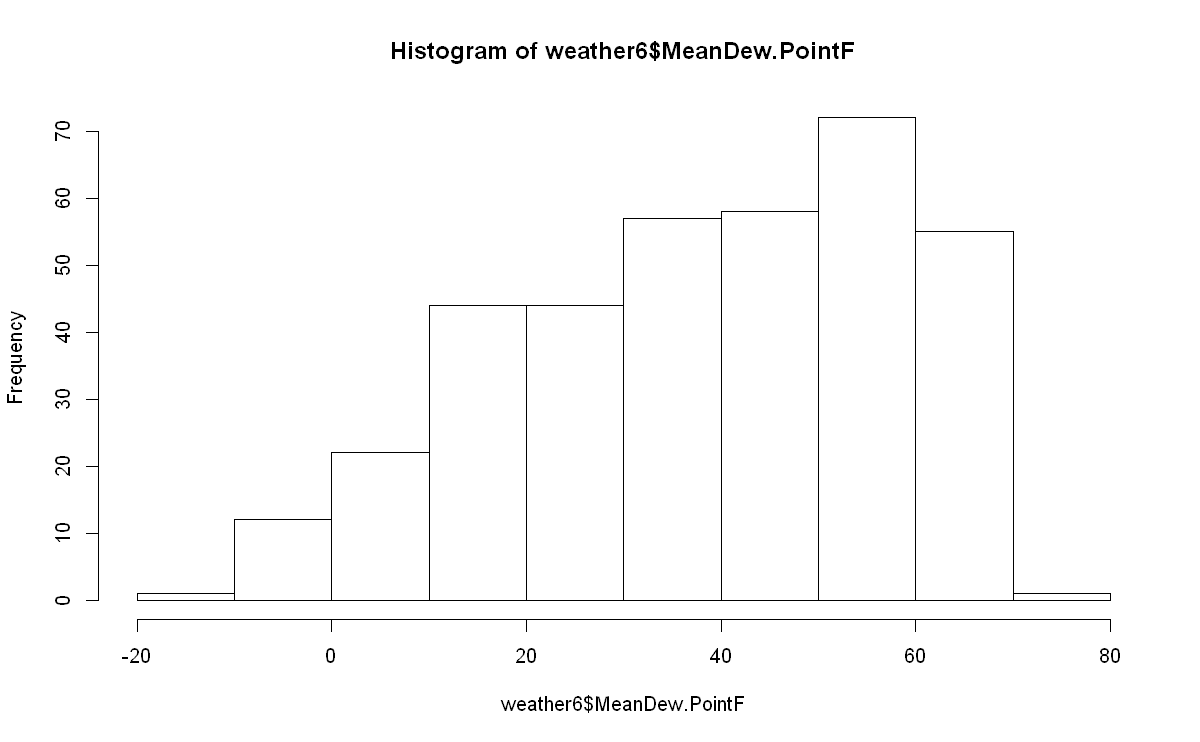

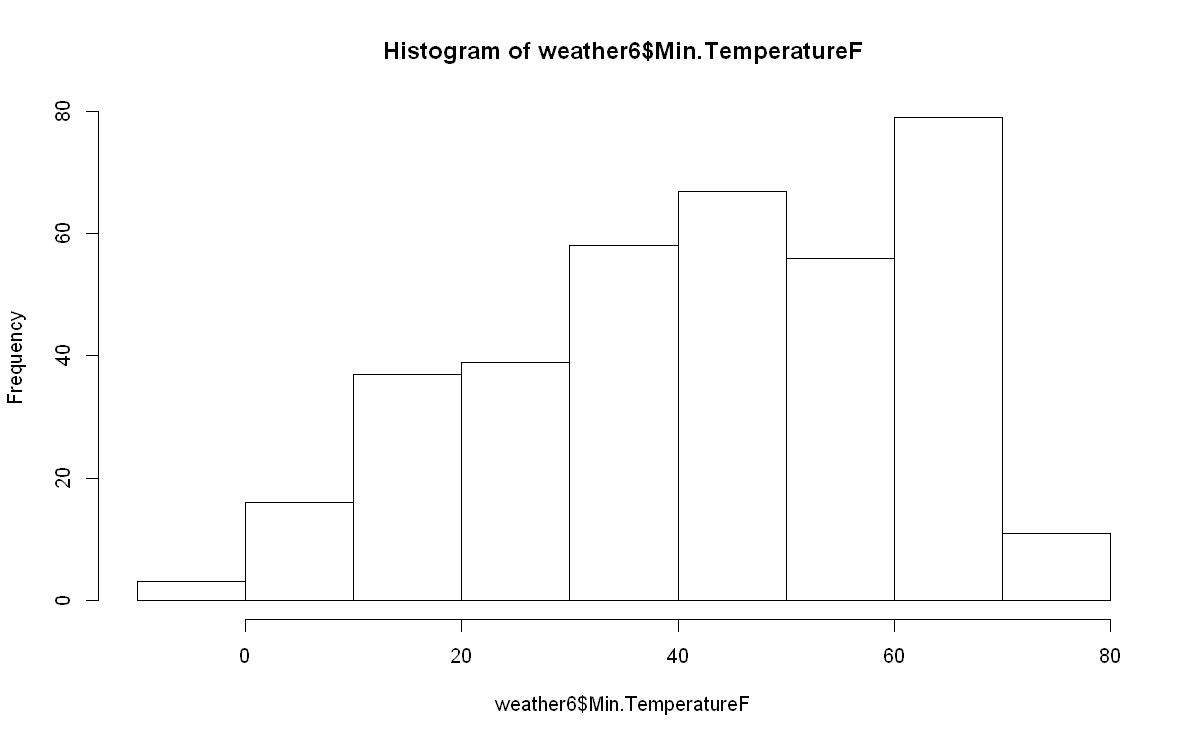

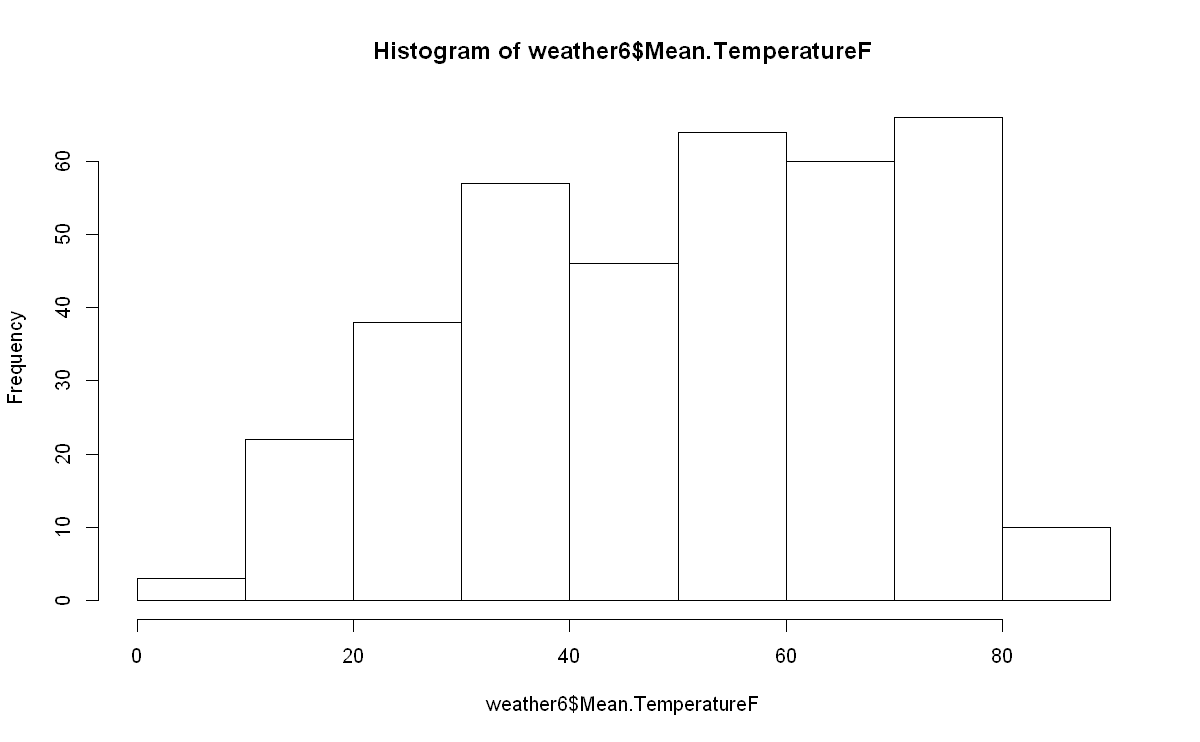

In [53]:

# Look at histogram for MeanDew.PointF
hist(weather6$MeanDew.PointF)

# Look at histogram for Min.TemperatureF
hist(weather6$Min.TemperatureF)

# Compare to histogram for Mean.TemperatureF
hist(weather6$Mean.TemperatureF)

## Upper and lower case
Making strings uppercase and lowercase (base)

In [54]:
upper <- toupper(c("select", "Ac", "kErin"))

In [55]:
tolower(upper)

[1] "select" "ac"     "kerin"

In [56]:
#renaming the columnames
new_colnames <- tolower(names(weather6))
# A simple regular expression to replace dots with spaces
# This might have unintended consequences, so be sure to check the results
new_colnames <- gsub(x = new_colnames, pattern = "\\.", replacement = "\\_")
# Clean up column names
names(weather6) <- new_colnames

# Replace empty cells in events column
weather6$events[weather6$events == ""] <- "None"
    
# Print the first 6 rows of weather6
head(weather6)

date,events,cloudcover,max_dew_pointf,max_gust_speedmph,max_humidity,max_sea_level_pressurein,max_temperaturef,max_visibilitymiles,max_wind_speedmph,...,mean_visibilitymiles,mean_wind_speedmph,meandew_pointf,min_dewpointf,min_humidity,min_sea_level_pressurein,min_temperaturef,min_visibilitymiles,precipitationin,winddirdegrees
2014-12-01,Rain,6,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-10,Rain,8,45,29,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357
2014-12-11,Rain-Snow,8,37,28,92,29.81,39,10,21,...,7,13,31,27,82,29.44,32,1,0.02,230
2014-12-12,Snow,7,28,21,85,29.88,39,10,16,...,10,11,27,25,64,29.81,31,7,0.00,286
2014-12-13,None,5,28,23,75,29.86,42,10,17,...,10,12,26,24,55,29.78,32,10,0.00,298
2014-12-14,None,4,29,20,82,29.91,45,10,15,...,10,10,27,25,53,29.78,33,10,0.00,306
